# Contents
1.Introduction
2.Analysing Data
3.Manipulating Data
4.Preparing Data for Machine Learning
5.Methods of classfication
   .decision tree 
   .Random forest 
   .KNN 
6.Checking  Results of Classification with Confusion Matrix
7.conclusion.





# 1.Introduction




This datasetis about the mushroom which is safe to eat or deadly poison.
I will examine the data and create a machine learning algorythm which can detect which mushroom is edible and which is poisinous due to it's specifications like cap shape-color or gill color-size. 
Let's examine the data.


# importing libraries 



In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# importing the data file


In [6]:
Mushroom_path = pd.read_csv(r'C:\Users\rksan\Downloads\Mushroom.csv')



# 2. Analysing Data


 I  have imported the data and now I will use 
.head and .info methods to get more details about dataset.



In [7]:
Mushroom_path.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
Mushroom_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [9]:
Mushroom_path["class"].unique()

array(['p', 'e'], dtype=object)

We have a class column which states mushrooms poisinous(p) or edible(e).
Also other 22 features has string values too. 
So we should change the datatype to int or float.
Also I found the "veil-type" has just one unique value and it's "p".
so need we should get rid of it. But how can we do that?
Let's see 

In [40]:
Mushroom_path['class'].value_counts()


0    4208
1    3916
Name: class, dtype: int64

# Now let’s visualize the count of edible and poisonous mushrooms using Seaborn


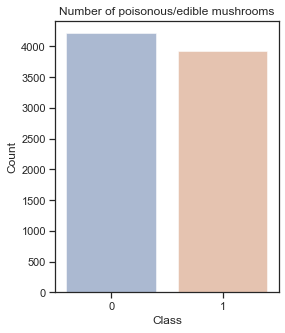

In [44]:
count = Mushroom_path['class'].value_counts()
plt.figure(figsize=(4,5))
sns.barplot(count.index, count.values, alpha=0.5)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()


# 3. Manipulating Data

We need have a class column as 1 or 0. 
So we can use below code to change "p" string to 1 and "e" to 0. 
Also I will get rid of "veil-type" column.





In [13]:
# Changing class values to 1 and 0 s.
Mushroom_path["class"] = [1 if i == "p" else 0 for i in Mushroom_path["class"]]

# Dropping "veil-type" column.
Mushroom_path.drop("veil-type",axis=1,inplace=True)



Now we will change feature column's values to floats.

All features values should be between 0 and 1.

In [18]:
for column in Mushroom_path.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(Mushroom_path[column].unique())-1)
    for i in Mushroom_path[column].unique():
        Mushroom_path[column] = [value if letter == i else letter for letter in Mushroom_path[column]]
        value += step


now below we will see that all columns has float or integer values.


In [22]:
data_check = Mushroom_path.head()
data_check = data_check.append(Mushroom_path.tail())
data_check

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667
8119,0,0.8,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8120,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.333333,0.0,0.00,1.000,0.6,1.000000
8121,0,0.6,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.090909,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8122,1,0.8,0.333333,0.000000,1.0,0.750,0.0,0.0,0.0,0.727273,...,0.0,1.0,0.00,0.000,0.000000,0.0,0.25,0.500,0.6,1.000000
8123,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,0.750,1.0,1.000000


# 4. Preparing Data for Machine Learning

Now we will choose x and y axis and split these datas to train or test.

In [21]:
from sklearn.model_selection import train_test_split
y = Mushroom_path["class"].values    # "class" column as numpy array.
x = Mushroom_path.drop(["class"], axis=1).values    # All data except "class" column. I didn't use normalization because all data has values between 0 and 1.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)   

# 5. Classification Methods

Decision Tree Classification

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))


Test Accuracy: 100.0%


Random Forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))


Test Accuracy: 100.0%


.KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))


Best KNN Value: 1
Test Accuracy: 100.0%


Logistic Regression Classification

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))


Test Accuracy: 97.05%


# 6. Checking Classification Results with Confusion Matrix

In this section I will check the results with confusion matrix on Logistic Regression and KNN Classification. 
Logistic Regression has accuracy of  97.05% and KNN's has 100%.



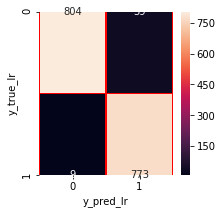

In [34]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()


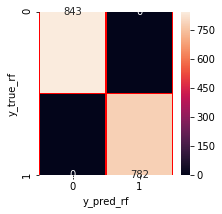

In [35]:
y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(3,))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

# 7. Conclusion

With confusion matrix we saw that our train and test datas balanced, so there is no problem 
Most of classfication methods hit 100% accuracy with this dataset.